<a href="https://colab.research.google.com/github/dhimasyp/PRAKTIKUM_ML_120-255/blob/Anisa/(versi_3)_Kegiatan_Modul_2_Keg1_ML_Anisa120.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Soal Praktikum Convolutional Neural Network**

## Kegiatan 1 **(Individu)** 
70 poin

Pada tugas praktikum modul 2 CNN kali ini anda diminta untuk membuat model dengan kombinasi layer Convolutional, Pooling, dan Fully Connected Layer

Praktikum kali ini anda diminta menggunakan dataset breast cancer yang bisa diunduh menggunakan kaggle API dari: https://www.kaggle.com/forderation/breakhis-400x


Dataset tersebut merupakan gambar mikroskopis dengan zoom sebesar 400x pada pasien yang mengalami kanker payudara (Breast Cancer), dimana pada dataset tesebut dibagi menjadi dua kelas yaitu Tumor ganas (Malignant) dan Tumor jinak (Benign). Dataset sudah dibagi menjadi folder training dan testing yang berbeda dengan struktur sebagai berikut:
- BreaKHis 400X/train/benign/*kumpulan gambar
- BreaKHis 400X/train/malignant/*kumpulan gambar
- BreaKHis 400X/test/benign/*kumpulan gambar
- BreaKHis 400X/test/malignant/*kumpulan gambar

Anda diminta membuat 2 scenario modelling dengan kriteria sebagai berikut:
- 1. membuat model training dengan CNN, diantara layer convolution buatlah pooling menggunakan metode **maxpooling** kemudian diakhir layer CNN tambahkan **globalmaxpooling** sebelum melakukan flatten (model1)
- 2. membuat model training dengan CNN, diantara layer convolution buatlah pooling menggunakan metode **averagepooling** kemudian diakhir layer CNN tambahkan **globalaveragepooling** sebelum melakukan flatten (model2)

**NOTE :** Dalam modul ini tidak diperbolehkan menggunakan teknik transferlearning dari pretrain model baik yang di bagun sendiri atau anda dapatkan dari sumber lain (tensorflow, keras, dan sebagainya)



---



### 1. Load Data

Task yang perlu dikerjakan:
1. Unduh dataset tersebut kemudian lakukan ektraksi zip
2. Menampilkan hasil jumlah pembagian
3. Menampilkan sample sebagian gambar dari kelas yang berbeda dengan ukuran 2 baris x 4 kolom



In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"anisaanggra","key":"13d6327a70641db9e15363d4b94800af"}'}

In [2]:
!ls -lha 'kaggle.json'

-rw-r--r-- 1 root root 67 Nov 10 07:40 kaggle.json


In [3]:
!pip install -q kaggle

In [4]:
# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle 
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download forderation/breakhis-400x

 99% 795M/803M [00:07<00:00, 114MB/s]
100% 803M/803M [00:07<00:00, 111MB/s]


In [6]:
! unzip breakhis-400x

Archive:  breakhis-400x.zip
  inflating: BreaKHis 400X/test/benign/SOB_B_A-14-22549AB-400-001.png  
  inflating: BreaKHis 400X/test/benign/SOB_B_A-14-22549AB-400-003.png  
  inflating: BreaKHis 400X/test/benign/SOB_B_A-14-22549AB-400-004.png  
  inflating: BreaKHis 400X/test/benign/SOB_B_A-14-22549AB-400-005.png  
  inflating: BreaKHis 400X/test/benign/SOB_B_A-14-22549AB-400-007.png  
  inflating: BreaKHis 400X/test/benign/SOB_B_A-14-22549AB-400-011.png  
  inflating: BreaKHis 400X/test/benign/SOB_B_A-14-22549AB-400-015.png  
  inflating: BreaKHis 400X/test/benign/SOB_B_A-14-22549AB-400-019.png  
  inflating: BreaKHis 400X/test/benign/SOB_B_A-14-22549AB-400-025.png  
  inflating: BreaKHis 400X/test/benign/SOB_B_A-14-22549AB-400-027.png  
  inflating: BreaKHis 400X/test/benign/SOB_B_A-14-22549AB-400-028.png  
  inflating: BreaKHis 400X/test/benign/SOB_B_A-14-22549CD-400-004.png  
  inflating: BreaKHis 400X/test/benign/SOB_B_A-14-22549CD-400-006.png  
  inflating: BreaKHis 400X/test/beni

In [7]:
# jika anda ingin menggunakan kaggle API untuk mengunduh dataset gunakan
# kode berikut untuk membantu anda membuat config kaggle.json
# pastikan anda mendaftar akun kaggle terlebih dahulu
# kemudian menuju halaman my account dan buat token API anda

api_token = {"username":"anisaanggra","key":"13d6327a70641db9e15363d4b94800af"}
import json
import zipfile
import os
with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)
!chmod 600 /root/.kaggle/kaggle.json

In [8]:
# Definisikan path untuk data train dan data validation
import os 

base_dir = '/content/BreaKHis 400X'

# membuat dan menentukan path untuk data training & test
train_dir = os.path.join(base_dir, 'train') 
test_dir = os.path.join(base_dir, 'test')

train_malignant_dir = os.path.join(train_dir, 'malignant')
train_benign_dir = os.path.join(train_dir, 'benign')

test_malignant_dir = os.path.join(test_dir, 'malignant')
test_benign_dir = os.path.join(test_dir, 'benign')

In [9]:
# 1.3 Jumlah Gambar dari Splitting 
print('total training Malignant images:', len(os.listdir(train_malignant_dir))) #memanggil codingan yang diatsnya
print('total training Benign images:', len(os.listdir(train_benign_dir))) #mengecek jumlah data train dan data valid perkelasnya
print('total test Malignant images:', len(os.listdir(test_malignant_dir)))
print('total test Benign images:', len(os.listdir(test_benign_dir)))

total training Malignant images: 777
total training Benign images: 371
total test Malignant images: 369
total test Benign images: 176


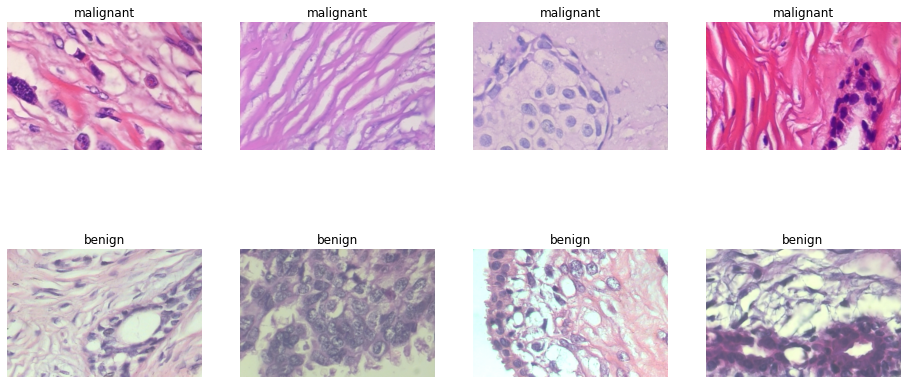

In [10]:
# 1.4 Menampilkan 4 image per label beserta judul label dengan ukuran 2 baris x 4 kolom
%matplotlib inline 

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 4 
ncols = 4 

pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_malignant_pix = [os.path.join(train_malignant_dir, fname) 
                for fname in os.listdir(train_malignant_dir)[pic_index-4:pic_index]]
next_benign_pix = [os.path.join(train_benign_dir, fname) 
                for fname in os.listdir(train_benign_dir)[pic_index-4:pic_index]]

for i, img_path in enumerate(next_malignant_pix+next_benign_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img) 
  plt.title(img_path.split(os.path.sep)[-2]) 

plt.show()


#### Contoh output kegiatan 1.3

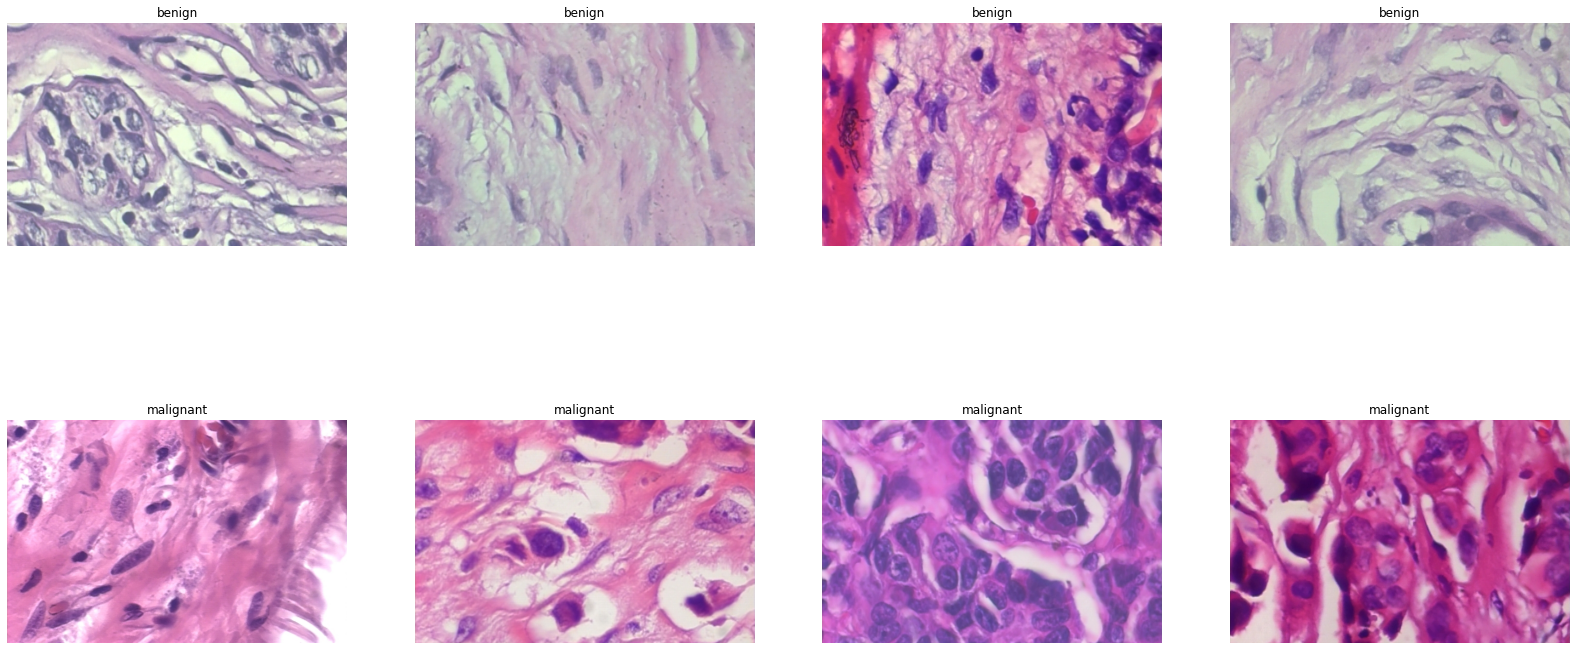

### 2. Preprocessing

Task yang perlu dikerjakan:
1. Gather data training dan testing dengan ukuran gambar **250x250**
2. Normalisasi dataset
3. Membuat label encoder


In [11]:
# Tulis Kode Anda Disini
# 2.1 Gather Data Train ukuran gambar 250 x 250 (mengubah ukuran gambar)
import cv2
import numpy as np

train_data = []
train_label = []
for r, d, f in os.walk(train_dir):
    for file in f:
        if ".png" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (250,250))
            train_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            train_label.append(label)

train_data = np.array(train_data)
train_label = np.array(train_label)

In [12]:
# Gather Data Validation ukuran gambar 250 x 250
test_data = []
test_label = []
for r, d, f in os.walk(test_dir):
    for file in f:
        if ".png" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (250,250))
            test_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            test_label.append(label)

test_data = np.array(test_data)
test_label = np.array(test_label)

In [13]:
print("Train Data = ", train_data.shape)
print("Train Label = ", train_label.shape)
print("Testing Data = ", test_data.shape)
print("Testing Label = ", test_label.shape)

Train Data =  (1148, 250, 250, 3)
Train Label =  (1148,)
Testing Data =  (545, 250, 250, 3)
Testing Label =  (545,)


In [14]:
# 2.3 Normalisasi dataset, membuat dan menampilkan hasil dari label encoder
print("Data sebelum di-normalisasi ", train_data[0][0][0])

x_train = train_data.astype('float32') / 255.0
x_test = test_data.astype('float32') / 255.0
print("Data setelah di-normalisasi ", x_train[0][0][0])

Data sebelum di-normalisasi  [206 223 212]
Data setelah di-normalisasi  [0.80784315 0.8745098  0.83137256]


In [15]:
# 2.3 Transformasi Label encoder
from sklearn.preprocessing import LabelEncoder

print("Label sebelum di-encoder ", train_label[:5])#data ke 5

lb = LabelEncoder()
y_train = lb.fit_transform(train_label)
y_test = lb.fit_transform(test_label)

print("Label setelah di-encoder ", y_train[:5])
print()
print("Label sebelum di-encoder ", train_label[-5:])
print("Label setelah di-encoder ", y_train[-5:])

Label sebelum di-encoder  ['benign' 'benign' 'benign' 'benign' 'benign']
Label setelah di-encoder  [0 0 0 0 0]

Label sebelum di-encoder  ['malignant' 'malignant' 'malignant' 'malignant' 'malignant']
Label setelah di-encoder  [1 1 1 1 1]


### 3. Modelling

Task yang perlu dikerjakan:
1. Membuat & menampilkan scenario Pertama
2. Membuat & menampilkan summary model scenario Kedua
3. Training model scenario Pertama
4. Training model scenario Kedua

**Note:** Minimal epoch yang didefinisikan adalah 100 epoch untuk setiap model yang dibangun

In [16]:
# Tulis Kode Anda Disini
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, Flatten, GlobalMaxPooling2D, AveragePooling2D, GlobalAveragePooling2D


In [17]:
# Feature Extraction Layer
model = Sequential()

model.add(InputLayer(input_shape=[250,250,3]))
model.add(Conv2D(filters=16, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(GlobalMaxPooling2D())
model.add(Flatten())

In [18]:
# Fully Connected Layer
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Print model summary
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 250, 250, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 125, 125, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 64)       0

In [19]:
# Compile model
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(lr=0.001), 
              loss='binary_crossentropy', 
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [20]:
H = model.fit(x_train, y_train, batch_size=32, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
36/36 [==============================] - 35s 117ms/step - loss: 0.5917 - acc: 0.6733 - val_loss: 0.5283 - val_acc: 0.7358
Epoch 2/100
36/36 [==============================] - 3s 84ms/step - loss: 0.4893 - acc: 0.7840 - val_loss: 0.5535 - val_acc: 0.7193
Epoch 3/100
36/36 [==============================] - 3s 83ms/step - loss: 0.4892 - acc: 0.7814 - val_loss: 0.5032 - val_acc: 0.7523
Epoch 4/100
36/36 [==============================] - 3s 83ms/step - loss: 0.4418 - acc: 0.8153 - val_loss: 0.4406 - val_acc: 0.8477
Epoch 5/100
36/36 [==============================] - 3s 88ms/step - loss: 0.3834 - acc: 0.8685 - val_loss: 0.4000 - val_acc: 0.8495
Epoch 6/100
36/36 [==============================] - 3s 84ms/step - loss: 0.3462 - acc: 0.8868 - val_loss: 0.4180 - val_acc: 0.8385
Epoch 7/100
36/36 [==============================] - 3s 84ms/step - loss: 0.3757 - acc: 0.8580 - val_loss: 0.3910 - val_acc: 0.8569
Epoch 8/100
36/36 [==============================] - 3s 85ms/step - loss: 

In [21]:
# Feature Extraction Layer 
model2 = Sequential()

model2.add(InputLayer(input_shape=[250,250,3]))
model2.add(Conv2D(filters=16, kernel_size=3, strides=1, padding='same', activation='relu'))
model2.add(AveragePooling2D(pool_size=2, padding='same'))
model2.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))
model2.add(AveragePooling2D(pool_size=2, padding='same'))
model2.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model2.add(AveragePooling2D(pool_size=2, padding='same'))
model2.add(GlobalAveragePooling2D())
model2.add(Flatten())

In [22]:
# Fully Connected Layer
model2.add(Dense(128, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

# Print model summary
print(model2.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 250, 250, 16)      448       
                                                                 
 average_pooling2d (AverageP  (None, 125, 125, 16)     0         
 ooling2D)                                                       
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 average_pooling2d_1 (Averag  (None, 63, 63, 32)       0         
 ePooling2D)                                                     
                                                                 
 conv2d_5 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 average_pooling2d_2 (Averag  (None, 32, 32, 64)      

In [23]:
# Compile model
from tensorflow.keras.optimizers import Adam

model2.compile(optimizer=Adam(lr=0.001), 
              loss='binary_crossentropy', 
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [24]:
H2 = model2.fit(x_train, y_train, batch_size=32, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
36/36 [==============================] - 4s 100ms/step - loss: 0.6343 - acc: 0.6655 - val_loss: 0.6105 - val_acc: 0.6771
Epoch 2/100
36/36 [==============================] - 3s 82ms/step - loss: 0.5619 - acc: 0.7003 - val_loss: 0.5260 - val_acc: 0.7486
Epoch 3/100
36/36 [==============================] - 3s 82ms/step - loss: 0.4677 - acc: 0.8066 - val_loss: 0.4703 - val_acc: 0.8385
Epoch 4/100
36/36 [==============================] - 3s 83ms/step - loss: 0.4491 - acc: 0.8101 - val_loss: 0.4544 - val_acc: 0.8440
Epoch 5/100
36/36 [==============================] - 3s 83ms/step - loss: 0.4375 - acc: 0.8197 - val_loss: 0.4630 - val_acc: 0.8165
Epoch 6/100
36/36 [==============================] - 3s 88ms/step - loss: 0.4220 - acc: 0.8354 - val_loss: 0.4757 - val_acc: 0.8055
Epoch 7/100
36/36 [==============================] - 3s 81ms/step - loss: 0.4116 - acc: 0.8345 - val_loss: 0.4325 - val_acc: 0.8404
Epoch 8/100
36/36 [==============================] - 3s 82ms/step - loss: 0

In [25]:
score = model.evaluate(x_train, y_train)

print('Loss: {:.2f}'.format(score[0]))
print('Accuracy: {:.2f}'.format(score[1]))

36/36 [==============================] - 1s 33ms/step - loss: 0.0100 - acc: 1.0000
Loss: 0.01
Accuracy: 1.00


In [26]:
score = model2.evaluate(x_train, y_train)

print('Loss: {:.2f}'.format(score[0]))
print('Accuracy: {:.2f}'.format(score[1]))

36/36 [==============================] - 1s 32ms/step - loss: 0.2579 - acc: 0.9024
Loss: 0.26
Accuracy: 0.90


### 4. Result

Task yang perlu dikerjakan:
1. Plot hasil akurasi dan loss dari kedua model menjadi 1 canvas
2. Melakukan uji coba dari salah satu gambar test pada model 1 dan model 2
3. Klasifikasi report dari kedua model
4. Jika hasil akurasi model CNN klasifikasi report kedua model diatas 90%

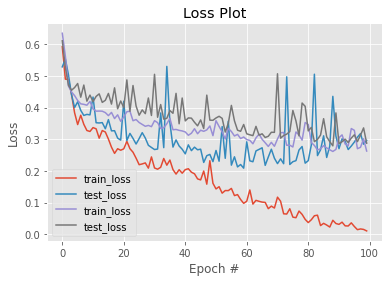

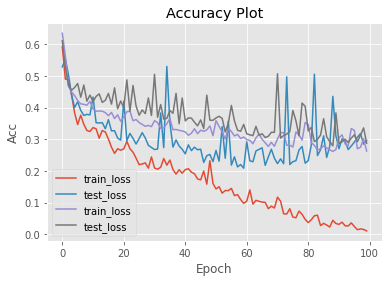

In [27]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="test_loss")
plt.plot(np.arange(0, 100), H2.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H2.history["val_loss"], label="test_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="test_loss")
plt.plot(np.arange(0, 100), H2.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H2.history["val_loss"], label="test_loss")
plt.title("Accuracy Plot")
plt.xlabel("Epoch")
plt.ylabel("Acc")
plt.legend()
plt.show()

**Contoh output**

Tugas 4.1

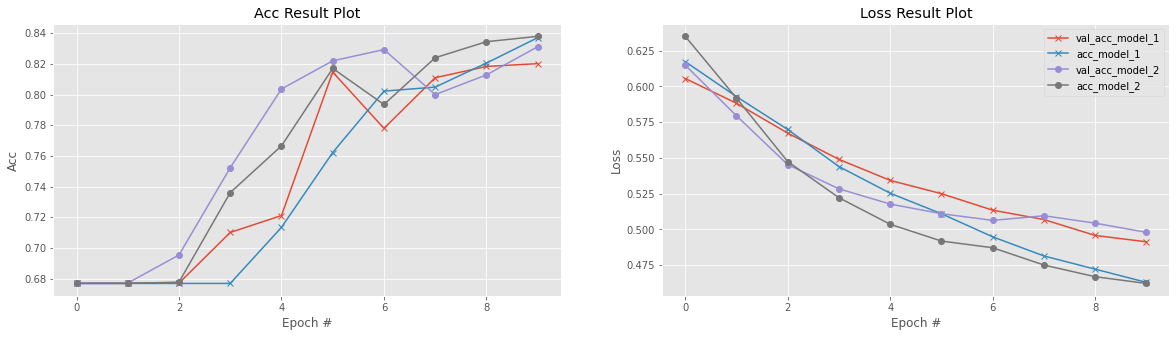

Tugas 4.2 

* Actual class ['benign']
* Hasil prediksi model 1
* Predicted class benign
* Hasil prediksi model 2
* Predicted class benign

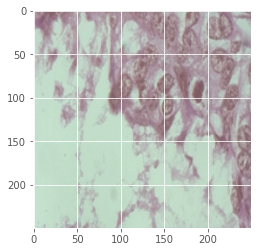

[0]
m


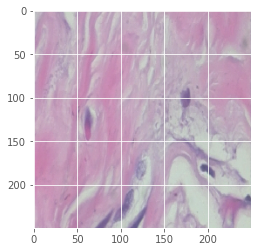

In [28]:
#test model 1
from keras.preprocessing import image
img_ = image.load_img("/content/BreaKHis 400X/train/benign/SOB_B_A-14-22549AB-400-002.png", target_size=(250, 250))
imag = image.img_to_array(img_)
imag = np.expand_dims(imag, axis=0)
pred = model.predict(imag)
pred = np.argmax(pred,axis=1)
print(pred)
print(label[pred[0]])
plt.imshow(img_)

[0]
m


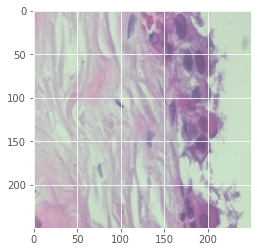

In [34]:
from keras.preprocessing import image
img_ = image.load_img("/content/BreaKHis 400X/test/benign/SOB_B_A-14-22549AB-400-001.png", target_size=(250, 250))
imag = image.img_to_array(img_)
imag = np.expand_dims(imag, axis=0)
pred = model2.predict(imag)
pred = np.argmax(pred,axis=1)
print(pred)
print(label[pred[0]])
plt.imshow(img_)

In [31]:
#4.3
from sklearn.metrics import classification_report

pred = model.predict(x_test)
labels = (pred > 0.5).astype(np.int)

print(classification_report(y_test, labels))

              precision    recall  f1-score   support

           0       0.88      0.81      0.84       176
           1       0.91      0.95      0.93       369

    accuracy                           0.90       545
   macro avg       0.90      0.88      0.89       545
weighted avg       0.90      0.90      0.90       545



In [32]:
from sklearn.metrics import classification_report

pred2 = model2.predict(x_test)
labels2 = (pred > 0.5).astype(np.int)

print(classification_report(y_test, labels2))

              precision    recall  f1-score   support

           0       0.88      0.81      0.84       176
           1       0.91      0.95      0.93       369

    accuracy                           0.90       545
   macro avg       0.90      0.88      0.89       545
weighted avg       0.90      0.90      0.90       545



## Kegiatan 2 **(berkelompok)**
30 poin


**Ketentuan Wajib**
* Tulis dokumentasi tugas kelompok anda dalam file README.md
* Isi data tugas kelompok anda dalam google form berikut [cek disini](https://docs.google.com/forms/d/e/1FAIpQLSfXRa5gXfd4PcaxWkKifGsaliQ5koJL3xllT-oaTpPrrXU87Q/viewform?usp=sf_link)
* Cek daftar dataset seluruh praktikan [disini](https://docs.google.com/spreadsheets/d/1qyu5AVDhPhegpRTbNaDoq5qXX4_CX09Q7tYyD-fkF_c/edit?usp=sharing)
* Seluruh data harus terkumpul maksimal H-1 praktikum
* Tidak diperbolehkan berganti anggota kelompok selama satu semester ini
* Tidak diperbolehkan berganti repository selama mengerjakan tugas kelompok ini
* Pengantian dataset atau jurnal rujukan harap menginformasikan ke asisten terlebih dahulu
* Pastikan anda menggunakan akun github pribadi untuk melakukan commit dan push

**Penilaian**
* Keaktifan dalam tim
* Kontribusi dalam proyek dan tim
* Penerapan prinsip kerja Agile (sprint backlog dan report terdokumentasikan dengan baik)
* Kelengkapan dokumen proyek
* Progress pengerjaan tugas kelompok
* Pendokumentasian proyek "clear and clean documentation"

**Materi pendukung**
* [Project documentation](https://realpython.com/documenting-python-code)
* [Github readme](https://docs.github.com/en/github/writing-on-github/getting-started-with-writing-and-formatting-on-github/basic-writing-and-formatting-syntax)
* [Sprint backlog](https://www.lucidchart.com/blog/how-to-develop-a-product-backlog-in-agile)


**Tugas**

Melanjutkan tugas kelompok di modul sebelumya sekarang kerjakan beberapa poin berikut untuk didemokan kepada asisten masing-masing.

*   Melakukan proses preprocessing dataset
*   Melakukan training beberapa skema model menggunakan model CNN sederhana buatan sendiri **(minimal 2 model)** *tidak diperbolehkan menggunakan transfer learning*
* Menyimpan model yang telah di training kedalam file `.h5` [Lihat disini](https://www.tensorflow.org/tutorials/keras/save_and_load)
*  Mencatat hasil perkembangan tugas kelompok dalam file `sprint_project.xlsx` tandai masing-masing task dengan status **Done** *untuk task yang telah selesai dikerjakan*, **On Going** *untuk task yang dalam proses pengerjaan*, **Waiting** *untuk task yang belum atau akan dikerjakan*
* Pastikan anda menulis tanggal mulai dan tanggal selesai masing-masing task dengan benar
* Pastikan anda menulis penanggung jawab masing-masing task (Penanggung jawab bertugas menyelesaikan dan menuntaskan masing-masing task yang diberikan)
* `commit` dan `push` seluruh perkerjaan yang anda lakukan kedalam branch pribadi dalam repository tugas kelompok yang telah anda buat sebelumnya.
* Presentasikan kepada asisten tentang apa yang anda lakukakan selama mengerjakan tugas kelompok ini. Ceritakan tentang tugas masing-masing anggota,  kendala dalam mengerjakan tugas sampai solusi yang anda lakukan saat mengerjakan tugas kelompok ini.

